<a href="https://colab.research.google.com/github/AliceKitchkin/Unsupervised-Machine-Learning/blob/main/FifaPlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Bibliotheken und Daten Import

In [1]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# evaluations
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score, silhouette_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_players = pd.read_csv("/content/drive/MyDrive/Bachelorarbeit/CSV/FifaPlayer.csv")

#Overview

In [165]:
data_players[(data_players.short_name == 'Rúben Dias')]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
46,239818,https://sofifa.com/player/239818/ruben-santos-...,Rúben Dias,Rúben dos Santos Gato Alves Dias,CB,87,91,102500000.0,170000.0,24,1997-05-14,187,82,10.0,Manchester City,English Premier League,1.0,RCB,3.0,NaN,2020-09-29,2027.0,38,Portugal,1354.0,LCB,4.0,Right,4,2,3,Medium/High,Normal (185+),Yes,197300000.0,#Tackling,"Solid Player, Leadership, Power Header",61.0,38.0,65.0,68.0,88.0,88.0,54,29,87,81,32,64,46,48,74,74,57,65,59,87,56,74,78,88,88,22,92,85,39,51,45,81,90,89,85,7,8,13,7,12,36.439962,61+3,61+3,61+3,59,60,60,60,59,61+3,61+3,61+3,64+3,70+3,70+3,70+3,64+3,78+3,83+3,83+3,83+3,78+3,80+3,86+3,86+3,86+3,80+3,17+3,https://cdn.sofifa.net/players/239/818/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [4]:
data_players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [5]:
data_players.shape

(19239, 110)

In [6]:
data_players.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

In [7]:
#get only the columns
data_players.describe().columns

Index(['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

#Handling Missing Values

In [8]:
#before mean fill
data_players.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [9]:
#fill na with mean
data_players = data_players.fillna(data_players.mean())

In [10]:
#after drop
data_players.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

#KMeans Clustering

In [11]:
data = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

In [12]:
data = data[data.overall>86]

In [13]:
names = data.short_name.tolist()
data = data.drop(['short_name'], axis=1)

##Feature Scaling

In [14]:
#Scaling with minMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
df_data_scaled = pd.DataFrame(data_scaled)

In [15]:
#after scaling
df_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.750,0.357341,0.886364,0.8750,0.147059,0.333333,0.285714,0.0,0.446154,0.2,0.28125,0.000492,0.409091,0.75,0.75,1.0,0.347380,0.727273,0.964286,0.943958,1.000000,0.017241,0.166667,0.891566,1.000000,0.731707,0.951613,0.975610,1.000000,1.000000,1.000000,0.966102,1.000000,0.898305,0.66,0.912281,1.000000,1.000000,0.822222,0.571429,0.615385,0.500000,1.000000,0.300000,0.3625,0.965116,1.000000,0.780488,1.000000,0.064935,0.301205,0.192771,0.011628,0.079545,0.142857,0.116279,0.057471,0.0
1,0.833333,0.625,0.587258,0.696970,0.7500,0.588235,0.583333,0.067227,0.0,0.123077,0.2,0.18750,0.000337,0.363636,0.75,0.75,1.0,0.498007,0.568182,0.964286,0.607705,0.722555,0.189655,0.733333,0.722892,1.000000,0.975610,0.854839,0.987805,0.872093,0.829268,0.892857,0.610169,0.891892,0.661017,0.64,0.666667,0.928571,0.783333,0.911111,0.841270,0.676923,0.826923,0.916667,0.828571,0.4750,0.988372,0.725490,0.963415,0.741935,0.259740,0.385542,0.132530,0.116279,0.022727,0.109890,0.046512,0.080460,0.0
2,0.666667,0.500,0.174515,0.696970,1.0000,0.647059,0.638889,0.025210,0.0,0.092308,0.2,0.19375,0.000347,0.272727,0.75,1.00,1.0,0.173690,0.772727,1.000000,0.635726,0.784209,0.017241,0.500000,0.915663,1.000000,0.975610,0.774194,0.951220,0.906977,0.853659,0.880952,0.728814,0.891892,0.796610,0.82,0.824561,1.000000,0.650000,1.000000,1.000000,0.692308,0.653846,0.988095,0.571429,0.2250,0.988372,0.627451,0.939024,0.967742,0.116883,0.265060,0.192771,0.023256,0.079545,0.142857,0.116279,0.091954,0.0
3,0.666667,0.500,0.639889,0.696970,0.5625,0.294118,0.222222,0.285714,0.0,0.138462,0.6,0.29375,0.126911,0.525811,1.00,1.00,1.0,0.616173,0.863636,0.803571,0.803853,0.969173,0.068966,0.100000,0.891566,0.858824,0.646341,0.870968,0.951220,0.988372,0.939024,0.916667,0.796610,0.986486,0.932203,0.84,1.000000,0.642857,0.816667,0.688889,0.507937,0.753846,0.192308,0.845238,0.571429,0.3250,0.883721,0.901961,1.000000,0.903226,0.259740,0.265060,0.253012,0.046512,0.056818,0.142857,0.127907,0.091954,0.0
4,0.666667,0.500,0.620499,1.000000,0.6250,0.470588,0.277778,0.021008,0.0,0.246154,0.6,0.00000,0.000067,0.272727,1.00,0.75,0.5,0.597665,0.522727,0.857143,1.000000,0.784209,0.534483,0.600000,1.000000,0.847059,0.548780,1.000000,0.902439,0.906977,0.902439,0.869048,1.000000,0.932432,0.644068,0.58,0.701754,0.785714,0.716667,0.933333,0.492063,0.876923,0.596154,0.964286,0.757143,0.6875,0.906977,0.980392,0.878049,0.774194,0.688312,0.662651,0.542169,0.116279,0.102273,0.032967,0.069767,0.114943,0.0


In [16]:
#after scaling
df_data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.258865,0.324468,0.405906,0.446003,0.554521,0.533166,0.526005,0.295459,0.0,0.174795,0.417021,0.199734,0.083208,0.457948,0.638298,0.510638,0.414894,0.404716,0.528110,0.629731,0.522524,0.523563,0.421877,0.455484,0.634453,0.641552,0.609497,0.721002,0.648158,0.695695,0.665802,0.590426,0.649116,0.711328,0.584565,0.529362,0.626353,0.598784,0.601418,0.639243,0.657210,0.624877,0.596972,0.647163,0.591185,0.498670,0.674171,0.662495,0.641930,0.573095,0.445703,0.473212,0.446552,0.255814,0.257737,0.265607,0.267937,0.284177,0.125529
std,0.264229,0.258890,0.200059,0.268505,0.249870,0.227212,0.251499,0.380512,0.0,0.192887,0.297321,0.196440,0.204099,0.255606,0.207263,0.333613,0.334910,0.198078,0.216564,0.278364,0.324081,0.324352,0.316807,0.279528,0.335664,0.359310,0.325580,0.278388,0.353996,0.318271,0.340721,0.313732,0.289021,0.315066,0.253077,0.270647,0.255911,0.248578,0.283713,0.267519,0.183793,0.294107,0.215042,0.346516,0.296273,0.319575,0.356542,0.244797,0.280031,0.291273,0.321100,0.332219,0.326409,0.371777,0.353268,0.317438,0.372511,0.373863,0.264883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.125000,0.295014,0.204545,0.437500,0.397059,0.291667,0.023109,0.0,0.076923,0.200000,0.068750,0.000174,0.295455,0.500000,0.250000,0.000000,0.292568,0.345752,0.330357,0.243431,0.306387,0.189655,0.163721,0.512048,0.488235,0.469512,0.741935,0.310976,0.662791,0.518293,0.458333,0.559322,0.736486,0.406780,0.340000,0.412281,0.464286,0.391667,0.444444,0.563492,0.576923,0.461538,0.494048,0.300000,0.231250,0.552326,0.519608,0.463415,0.451613,0.181818,0.246988,0.162651,0.034884,0.051136,0.087912,0.040698,0.074713,0.000000
50%,0.166667,0.250000,0.440443,0.431818,0.562500,0.558824,0.555556,0.067227,0.0,0.123077,0.400000,0.168750,0.000347,0.525811,0.750000,0.500000,0.500000,0.432517,0.522727,0.767857,0.635726,0.630073,0.322476,0.500000,0.795181,0.788235,0.707317,0.838710,0.817073,0.848837,0.841463,0.702381,0.711864,0.851351,0.661017,0.560000,0.649123,0.571429,0.633333,0.711111,0.682540,0.707692,0.596154,0.833333,0.600000,0.387500,0.813953,0.745098,0.719512,0.677419,0.350649,0.385542,0.361446,0.093023,0.090909,0.120879,0.081395,0.091954,0.000000
75%,0.333333,0.500000,0.522161,0.659091,0.718750,0.676471,0.694444,0.285714,0.0,0.223077,0.600000,0.281250,0.126911,0.525811,0.750000,0.750000,0.500000,0.525626,0.704545,0.866071,0.789842,0.768796,0.715517,0.716667,0.879518,0.929412,0.884146,0.870968,0.932927,0.906977,0.902439,0.833333,0.872881,0.898649,0.762712,0.740000,0.842105,0.785714,0.816667,0.866667,0.746032,0.846154,0.730769,0.904762,0.828571,0.875000,0.936047,0.843137,0.878049,0.774194,0.753247,0.789157,0.795181,0.116279,0.125000,0.148352,0.127907,0.132184,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

##PCA

In [17]:
pca = PCA() #all components included
data_pca = pd.DataFrame(pca.fit_transform(data_scaled)) #runs the model on the data

Text(0, 0.5, 'Cumulative explained Variance')

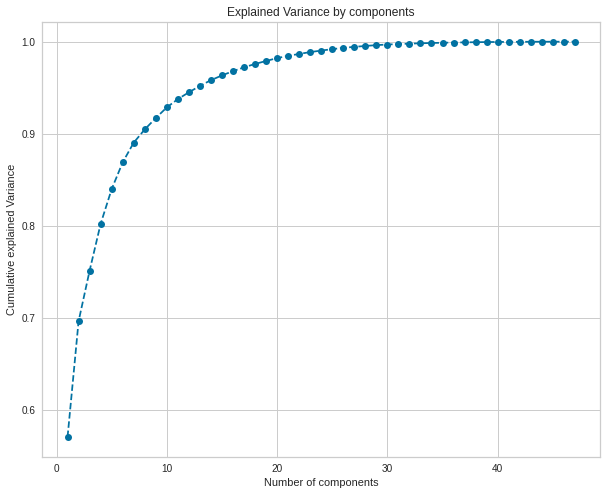

In [18]:
plt.figure(figsize=(10,8))
plt.plot(range(1,48), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained Variance')

###PCA 2D

PCA to visualize all features in a 2 dimension plot (5D to 2D)

In [19]:
pca_2d = PCA(n_components=2) #2D for the plot
data_2d = pd.DataFrame(pca_2d.fit_transform(data_scaled)) #runs the model on the data

In [20]:
data_2d.head()

,0,1
0,-1.357763,-1.414452
1,-1.068076,-0.859466
2,-1.124371,-1.236566
3,-1.235373,-1.106907
4,-1.341438,-0.046647


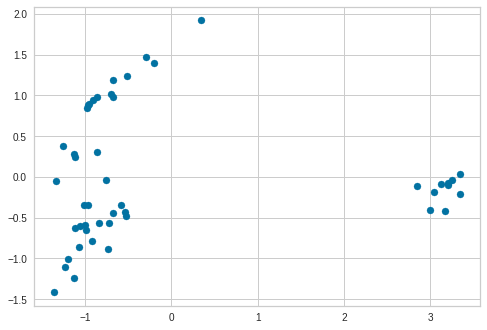

In [21]:
plt.scatter(data_2d[0], data_2d[1])

###PCA 3D

PCA to visualize 5 features (the 5 columns from the data above) in a 3 dimension plot (5D to 3D)

In [22]:
pca_3d = PCA(n_components=3) #3D for the plot
data_3d = pd.DataFrame(pca_3d.fit_transform(data_scaled)) #runs the model on the data

In [23]:
data_3d.head()

,0,1,2
0,-1.357763,-1.414452,0.137600
1,-1.068076,-0.859466,-0.850280
2,-1.124371,-1.236566,-0.628475
3,-1.235373,-1.106907,0.315390
4,-1.341438,-0.046647,-0.115935


##Clustering 2D

###Elbow Method 2D

To find the optimal number of cluster

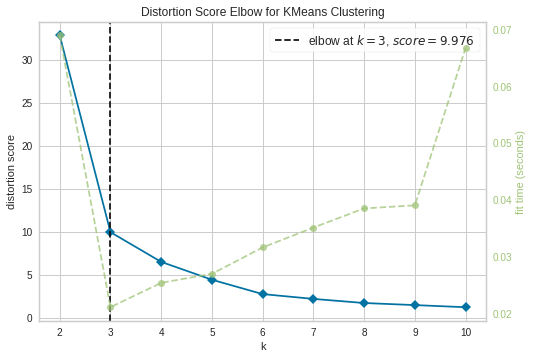

In [24]:
elbow10_2d = KElbowVisualizer(KMeans(), k=10)
elbow10_2d.fit(data_2d)
elbow10_2d.show()

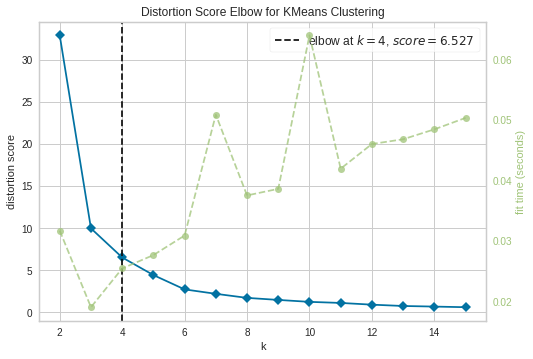

In [25]:
elbow15_2d = KElbowVisualizer(KMeans(), k=15)
elbow15_2d.fit(data_2d)
elbow15_2d.show()

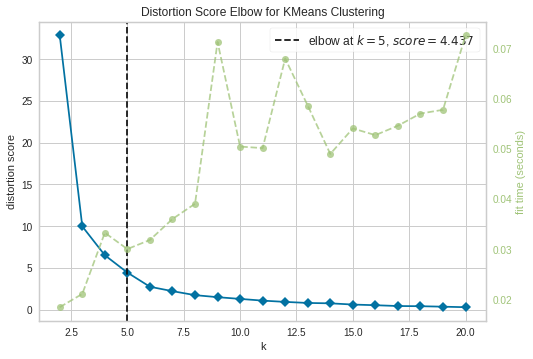

In [26]:
elbow20_2d = KElbowVisualizer(KMeans(), k=20)
elbow20_2d.fit(data_2d)
elbow20_2d.show()

In [27]:
print('k=10: ', elbow10_2d.elbow_value_)
print('k=15: ', elbow15_2d.elbow_value_)
print('k=20: ', elbow20_2d.elbow_value_)

k=10:  3
k=15:  4
k=20:  5


###Silhouette Score 2D

0.6714799255391136


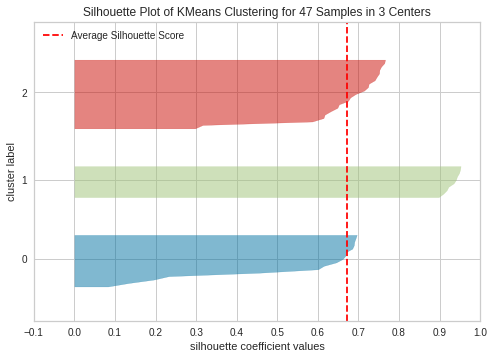

In [28]:
kmeans3_2d = KMeans(n_clusters = 3, random_state=42)
visualizer3_2d = SilhouetteVisualizer(kmeans3_2d, colors='yellowbrick')
visualizer3_2d.fit(data_2d)

print(visualizer3_2d.silhouette_score_)
visualizer3_2d.show()

0.5863026521669114


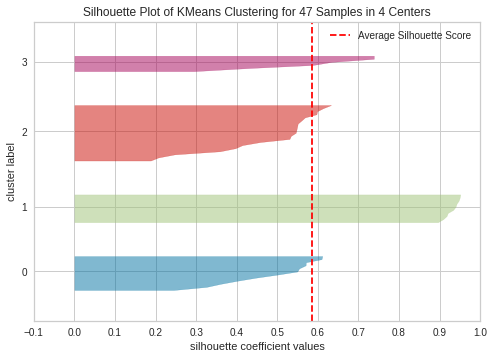

In [29]:
kmeans4_2d = KMeans(n_clusters = 4, random_state=42)
visualizer4_2d = SilhouetteVisualizer(kmeans4_2d, colors='yellowbrick')
visualizer4_2d.fit(data_2d)

print(visualizer4_2d.silhouette_score_)
visualizer4_2d.show()

0.6047124368753182


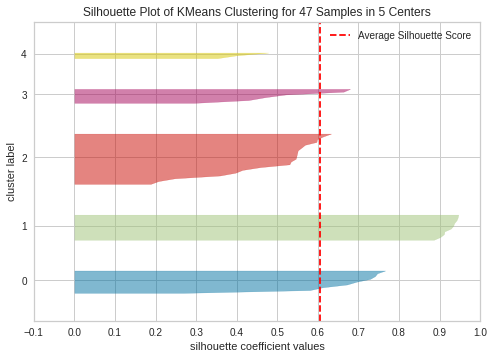

In [30]:
kmeans5_2d = KMeans(n_clusters = 5, random_state=42)
visualizer5_2d = SilhouetteVisualizer(kmeans5_2d, colors='yellowbrick')
visualizer5_2d.fit(data_2d)

print(visualizer5_2d.silhouette_score_)
visualizer5_2d.show()

In [31]:
print('03 Cluster: ', visualizer3_2d.silhouette_score_)
print('04 Cluster: ', visualizer4_2d.silhouette_score_)
print('05 Cluster: ', visualizer5_2d.silhouette_score_)

03 Cluster:  0.6714799255391136
04 Cluster:  0.5863026521669114
05 Cluster:  0.6047124368753182


###K-Means 2D

In [32]:
#specify the number of clusters we got from silhouette score
kmeans = KMeans(n_clusters=3)

In [33]:
#fit the scaled data
kmeans = kmeans.fit(data_2d)

In [34]:
#get the cluster labels
labels = kmeans.predict(data_2d)

In [35]:
#get the centroid values
centroids = kmeans.cluster_centers_

In [36]:
#get the cluster values
clusters = kmeans.labels_.tolist()

###Visualization 2D

In [37]:
data_v_2d = data_2d.copy()

In [38]:
#add new column for cluster
data_v_2d['cluster'] = clusters

#add new column for player names
data_v_2d['name'] = names

data_v_2d.columns = ['x', 'y', 'cluster', 'name']

In [39]:
data_v_2d.head()

,x,y,cluster,name
0,-1.357763,-1.414452,2,L. Messi
1,-1.068076,-0.859466,2,R. Lewandowski
2,-1.124371,-1.236566,2,Cristiano Ronaldo
3,-1.235373,-1.106907,2,Neymar Jr
4,-1.341438,-0.046647,2,K. De Bruyne


In [156]:
# data_v_2d[(data_v_2d.x < -0.5) & (data_v_2d.y.between(0,0.5))]
data_v_2d[(data_v_2d.x<1) & (data_v_2d.y>1.5)]

,x,y,cluster,name
46,0.343208,1.920645,0,Rúben Dias


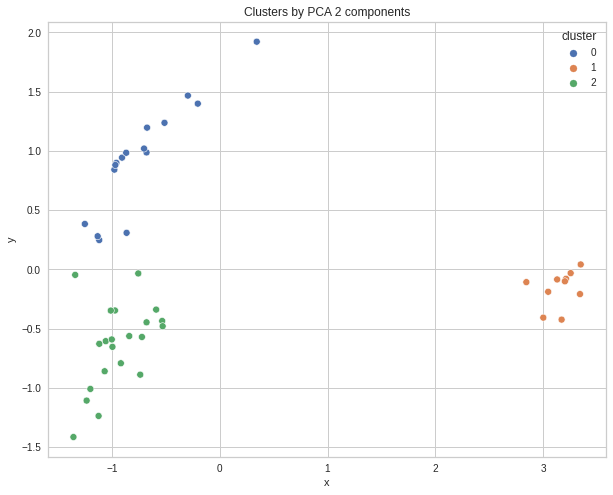

In [40]:
x_axis = data_v_2d['x'] #component/column x in table
y_axis = data_v_2d['y'] #component/column y in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=data_v_2d['cluster'], palette ="deep")
plt.title('Clusters by PCA 2 components')
plt.show()

##Clustering 3D

###Elbow Method 3D

To find the optimal number of cluster

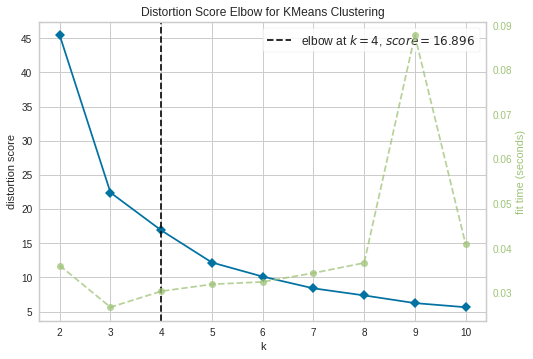

In [41]:
elbow10 = KElbowVisualizer(KMeans(), k=10)
elbow10.fit(data_3d)
elbow10.show()

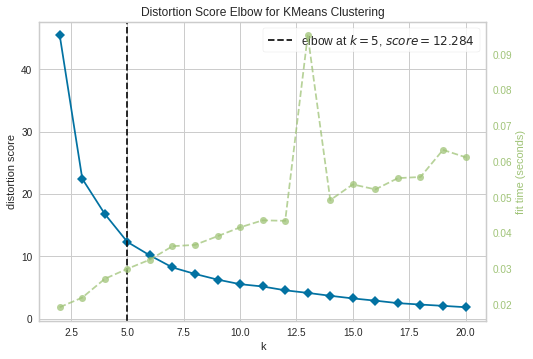

In [42]:
elbow20 = KElbowVisualizer(KMeans(), k=20)
elbow20.fit(data_3d)
elbow20.show()

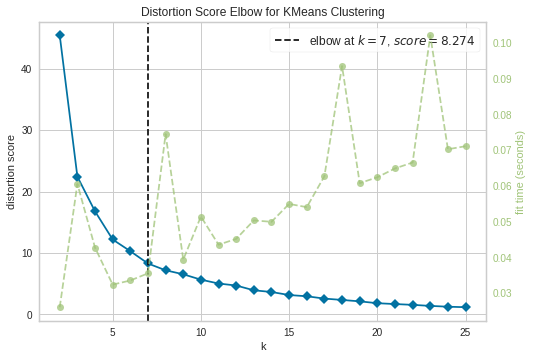

In [43]:
elbow25 = KElbowVisualizer(KMeans(), k=25)
elbow25.fit(data_3d)
elbow25.show()

In [44]:
print('k=10: ', elbow10.elbow_value_)
print('k=20: ', elbow20.elbow_value_)
print('k=25: ', elbow25.elbow_value_)

k=10:  4
k=20:  5
k=25:  7


###Silhouette Score 3D

0.5305659657436246


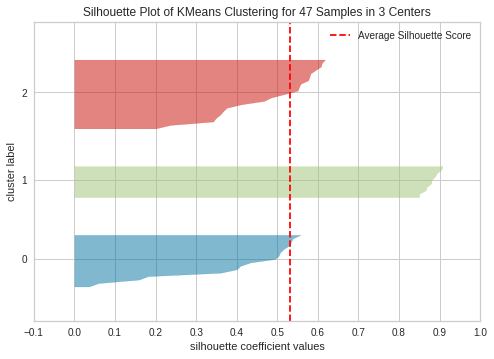

In [45]:
kmeans3 = KMeans(n_clusters = 3, random_state=42)
visualizer3 = SilhouetteVisualizer(kmeans3, colors='yellowbrick')
visualizer3.fit(data_3d)

print(visualizer3.silhouette_score_)
visualizer3.show()

0.4539996435170667


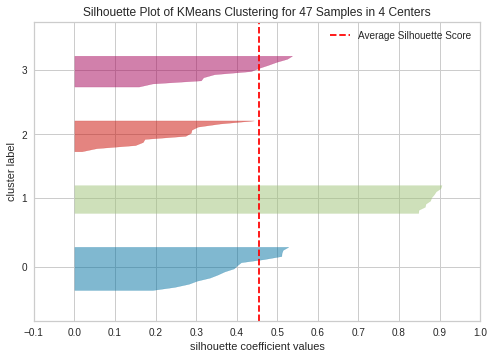

In [46]:
kmeans4 = KMeans(n_clusters = 4, random_state=42)
visualizer4 = SilhouetteVisualizer(kmeans4, colors='yellowbrick')
visualizer4.fit(data_3d)

print(visualizer4.silhouette_score_)
visualizer4.show()

0.4496450750056891


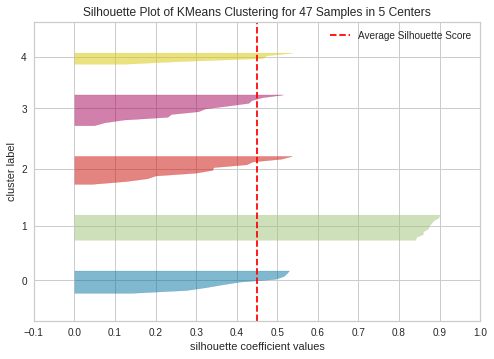

In [47]:
kmeans5 = KMeans(n_clusters = 5, random_state=42)
visualizer5 = SilhouetteVisualizer(kmeans5, colors='yellowbrick')
visualizer5.fit(data_3d)

print(visualizer5.silhouette_score_)
visualizer5.show()

0.4501607315266767


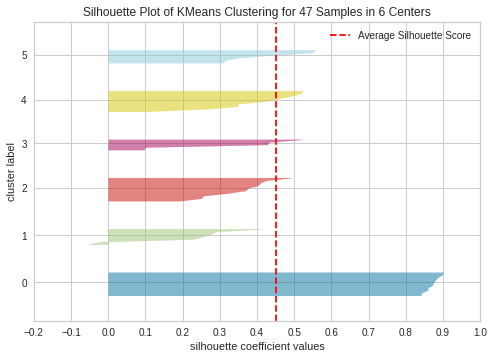

In [48]:
kmeans6 = KMeans(n_clusters = 6, random_state=42)
visualizer6 = SilhouetteVisualizer(kmeans6, colors='yellowbrick')
visualizer6.fit(data_3d)

print(visualizer6.silhouette_score_)
visualizer6.show()

In [49]:
print('03 Cluster: ', visualizer3.silhouette_score_)
print('04 Cluster: ', visualizer4.silhouette_score_)
print('05 Cluster: ', visualizer5.silhouette_score_)
print('06 Cluster: ', visualizer6.silhouette_score_)

03 Cluster:  0.5305659657436246
04 Cluster:  0.4539996435170667
05 Cluster:  0.4496450750056891
06 Cluster:  0.4501607315266767


###K-Means 3D

In [50]:
#specify the number of clusters we got from silhouette score
kmeans_3d = KMeans(n_clusters=3)

In [51]:
#fit the scaled data
kmeans_3d = kmeans.fit(data_3d)

In [52]:
#get the cluster labels
#labels_3d = kmeans_3d.predict(data_3d)

In [53]:
#get the centroid values
centroids_3d = kmeans_3d.cluster_centers_
centroids_3d

array([[-0.94247671, -0.63782726, -0.06178816],
       [ 3.15659165, -0.15921614,  0.05427856],
       [-0.73586909,  0.93665837,  0.04717286]])

In [54]:
#get the cluster values
clusters_3d = kmeans_3d.labels_.tolist()

###Visualization 3D

In [55]:
data_v_3d = data_3d.copy()

In [56]:
#add new column for cluster
data_v_3d['cluster'] = clusters_3d

#add new column for player names
data_v_3d['name'] = names

data_v_3d.columns = ['x', 'y', 'z', 'cluster', 'name']

In [57]:
data_v_3d.head()

,x,y,z,cluster,name
0,-1.357763,-1.414452,0.137600,0,L. Messi
1,-1.068076,-0.859466,-0.850280,0,R. Lewandowski
2,-1.124371,-1.236566,-0.628475,0,Cristiano Ronaldo
3,-1.235373,-1.106907,0.315390,0,Neymar Jr
4,-1.341438,-0.046647,-0.115935,0,K. De Bruyne


In [58]:
import plotly.express as px
fig = px.scatter_3d(data_v_3d, x='x', y='y', z='z', hover_name="name", hover_data=["name"], color='cluster')
fig.show()

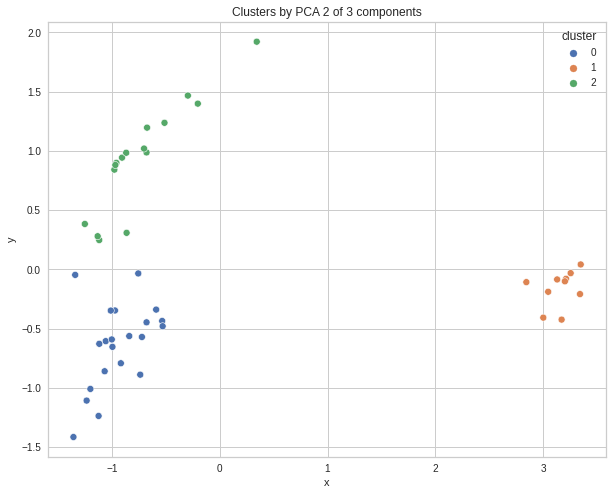

In [59]:
x_axis = data_v_3d['x'] #component/column x in table
y_axis = data_v_3d['y'] #component/column y in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=data_v_3d['cluster'], palette ="deep")
plt.title('Clusters by PCA 2 of 3 components')
plt.show()

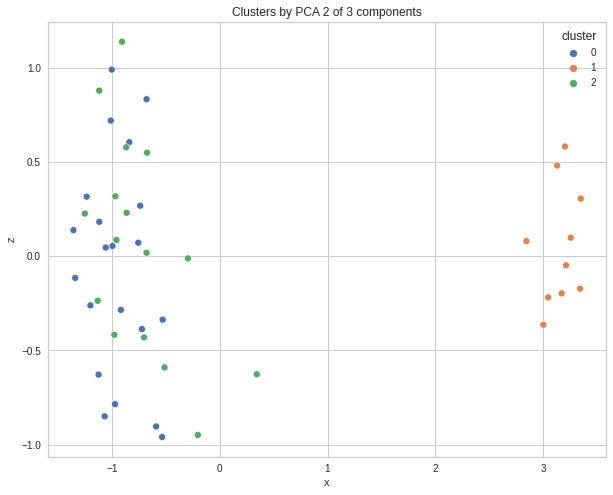

In [60]:
x_axis = data_v_3d['x'] #component/column x in table
z_axis = data_v_3d['z'] #component/column z in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, z_axis, hue=data_v_3d['cluster'], palette ="deep")
plt.title('Clusters by PCA 2 of 3 components')
plt.show()

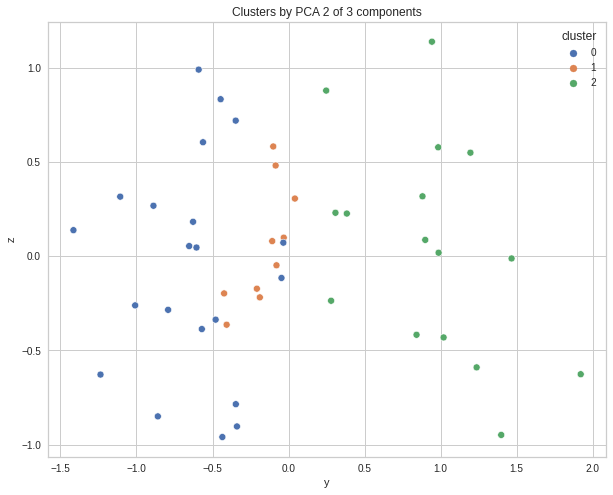

In [61]:
y_axis = data_v_3d['y'] #component/column y in table
z_axis = data_v_3d['z'] #component/column z in table
plt.figure(figsize=(10,8))
sns.scatterplot(y_axis, z_axis, hue=data_v_3d['cluster'], palette ="deep")
plt.title('Clusters by PCA 2 of 3 components')
plt.show()

#DBScan Clustering

In [133]:
data = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

In [134]:
#copy specific columns from the original dataset
data = data[data.overall>86].copy()
data = data.fillna(data.mean())
names = data.short_name.tolist()
data = data.drop(['short_name'], axis=1)

x = data.values

In [135]:
data.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,1369.000000,10.000000,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,36.439962
1,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,1353.000000,9.000000,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,36.439962
2,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,7.0,2023.0,38,1354.000000,7.000000,4,5,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,36.439962
3,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,10.0,2025.0,54,14480.848485,12.567852,5,5,5,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,36.439962
4,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,17.0,2025.0,7,1325.000000,7.000000,5,4,4,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,36.439962


In [136]:
x

array([[9.30000000e+01, 9.30000000e+01, 7.80000000e+07, ...,
        1.40000000e+01, 8.00000000e+00, 3.64399625e+01],
       [9.20000000e+01, 9.20000000e+01, 1.19500000e+08, ...,
        8.00000000e+00, 1.00000000e+01, 3.64399625e+01],
       [9.10000000e+01, 9.10000000e+01, 4.50000000e+07, ...,
        1.40000000e+01, 1.10000000e+01, 3.64399625e+01],
       ...,
       [8.70000000e+01, 9.20000000e+01, 1.14000000e+08, ...,
        6.00000000e+00, 7.00000000e+00, 3.64399625e+01],
       [8.70000000e+01, 9.10000000e+01, 1.16500000e+08, ...,
        1.10000000e+01, 1.30000000e+01, 3.64399625e+01],
       [8.70000000e+01, 9.10000000e+01, 1.02500000e+08, ...,
        7.00000000e+00, 1.20000000e+01, 3.64399625e+01]])

##Scaling

In [137]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_norm = pd.DataFrame(x_scaled)

##PCA 2D

In [138]:
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(x_norm))
reduced.head()

,0,1
0,-1.357763,-1.414452
1,-1.068076,-0.859466
2,-1.124371,-1.236566
3,-1.235373,-1.106907
4,-1.341438,-0.046647


##Nearest Neighbors

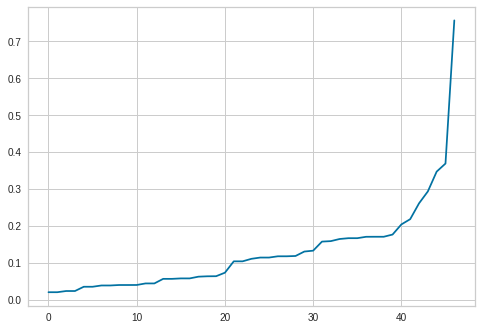

In [139]:
from sklearn.neighbors import NearestNeighbors

#calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors=2)

#fit the nearest neighbor
nbrs = nn.fit(reduced)

#returns two arrays: distance to the closest n_neighbors point and index for each point
distances, indices = nbrs.kneighbors(reduced)

#sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Hier kann man ablesen wie eps im DBScan gewählt werden sollte (~0.4), da wo die Kurve steil nach oben geht

##DBScan

In [140]:
#eps=0.4 und min_sample=2,3,4 haben den gleichen Silhouette Score wie
#eps=0.5 und min_sample=2,3,4,5

i_eps = [0.2, 0.3, 0.4, 0.5]
j_samples = [2, 3, 4, 5]
sscores = []

for i in i_eps:
  for j in j_samples:
    db = DBSCAN(eps=i, min_samples=j).fit(data_scaled)
    db_clusters = db.fit_predict(reduced)
    sc = silhouette_score(data_scaled, db.labels_)
    sscores.append(sc)

    print('eps = ', i)
    print('min_samples = ', j)
    print('silhouette_score = ', sc)
    print('')

print('Max Sihlouette Score: ', max(sscores))

eps =  0.2
min_samples =  2
silhouette_score =  -0.06902202972065018

eps =  0.2
min_samples =  3
silhouette_score =  0.022424722211224025

eps =  0.2
min_samples =  4
silhouette_score =  0.05467764888415697

eps =  0.2
min_samples =  5
silhouette_score =  0.04077131632178196

eps =  0.3
min_samples =  2
silhouette_score =  0.17149634535153568

eps =  0.3
min_samples =  3
silhouette_score =  0.1852964133291963

eps =  0.3
min_samples =  4
silhouette_score =  0.1852964133291963

eps =  0.3
min_samples =  5
silhouette_score =  0.19729639602662694

eps =  0.4
min_samples =  2
silhouette_score =  0.25654914968699954

eps =  0.4
min_samples =  3
silhouette_score =  0.25654914968699954

eps =  0.4
min_samples =  4
silhouette_score =  0.25654914968699954

eps =  0.4
min_samples =  5
silhouette_score =  0.1914059881642235

eps =  0.5
min_samples =  2
silhouette_score =  0.25654914968699954

eps =  0.5
min_samples =  3
silhouette_score =  0.25654914968699954

eps =  0.5
min_samples =  4
silhoue

In [141]:
db = DBSCAN(eps=0.5, min_samples=5).fit(data_scaled)
db_clusters = db.fit_predict(reduced)
labels = db.labels_

In [142]:
reduced['clusters'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'clusters', 'names']
reduced.head()

,x,y,clusters,names
0,-1.357763,-1.414452,0,L. Messi
1,-1.068076,-0.859466,0,R. Lewandowski
2,-1.124371,-1.236566,0,Cristiano Ronaldo
3,-1.235373,-1.106907,0,Neymar Jr
4,-1.341438,-0.046647,0,K. De Bruyne


##Visualization

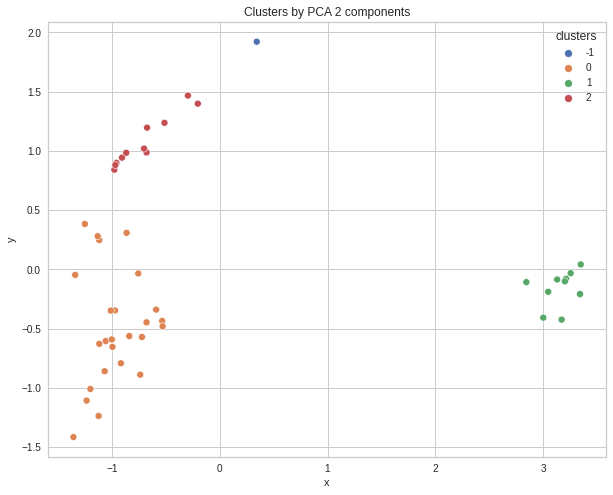

In [143]:
x_axis = reduced['x'] #component/column x in table
y_axis = reduced['y'] #component/column y in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=reduced['clusters'], palette ="deep")
plt.title('Clusters by PCA 2 components')
plt.show()

#Performance

In [116]:
print("Silhouette Coefficient KMeans: %0.5f"% visualizer3_2d.silhouette_score_)
print("Silhouette Coefficient DBScan: %0.5f"% silhouette_score(data_scaled, labels))

Silhouette Coefficient KMeans: 0.67148
Silhouette Coefficient DBScan: 0.25655
